In [183]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [184]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### 1. Reading and Inspecting Data

In [185]:
leadscore_df = pd.read_csv(r"C:\Users\Administrator\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [186]:
leadscore_df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [187]:
#Dimension of the data set 

leadscore_df.shape

(9240, 37)

In [188]:
 leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [189]:
leadscore_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


Observation:
There is huge difference between min and max values of the columns 'TotalVisits' , 'Total Time Spent on Website' and 'PAges Views per visit' which can be considered as outliers and will be handled while doing EDA.

### 2.Data Cleaning

In [190]:
leadscore_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

Numeric columns: 7 and Categorical columns : 30

No inconsistency in datatypes, no need of any conversion.

In [191]:

leadscore_df.drop_duplicates(subset=None, inplace=True)

In [192]:
leadscore_df.shape

(9240, 37)

There are no duplicate values as the shape remains the same.

NOTE:There are few columns for which the data is select which needs to be handled.


In [193]:
# Finding column names in which 'Select' level is present

cols=list(leadscore_df.columns)
for i in cols:
    if 'Select' in leadscore_df[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


Observation:From the above output, it can be understood that for the above columns,no option is selected while filling the form so it remained in select state. So, we need to impute it with 'NULL' values. 

In [194]:
# Imputing 'Select' with NaN'  :-

leadscore_df = leadscore_df.replace('Select', np.nan)

In [195]:
# After 'NaN' imputation Checking 'Select' level is available or not:-

cols=list(leadscore_df.columns)
for i in cols:
    if 'Select' in leadscore_df[i].values:
        print(i)
    else:
        print('None')

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


#### Checking Null/Missing values

In [196]:
leadscore_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [197]:
#Checking percentage of missing/null values :-

round(100*(leadscore_df.isnull().sum()/len(leadscore_df)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

Observation:
1. Lead Profile,How did you hear about X education and Lead Quality columns are having a missing values percentage of 74.19.So, it is better to drop the columns.
2. Below are the few columns for which the missing values percentage is mote that 30% .So, it is better to drop these columns:
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
City                                             39.71
Tags                                             36.29
Specialization                                   36.58

Note1:Lead Quality,Tags,Asymmetrique scores,Profile and Last Notable Activity are created by the sales team after contacting the leads so we can drop these columns.
Note2 : Analyze Specialization separately to handle the missing values.

#### Handling Missing values 

In [198]:
#Creating copy of original datarframe
leadscore_df3=leadscore_df.copy()

In [199]:
# Listing all the columns having more than 30% missing values into 'missing_columns':-

missing_columns_30 = leadscore_df.columns[100*(leadscore_df.isnull().sum()/len(leadscore_df)) > 30]
print(missing_columns_30)

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [200]:
#Drop the columns except for specialization 
miss_col=missing_columns_30.drop('Specialization')
# Dropping the columns having more than 30% missing values
leadscore_df3 = leadscore_df3.drop(miss_col, axis=1).copy()

In [201]:
leadscore_df3.shape

(9240, 28)

In [202]:
# Checking the remaining columns for missing values

round(100*(leadscore_df3.isnull().sum()/len(leadscore_df3)),2)


Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [203]:
print(leadscore_df3['Specialization'].dtype)


object


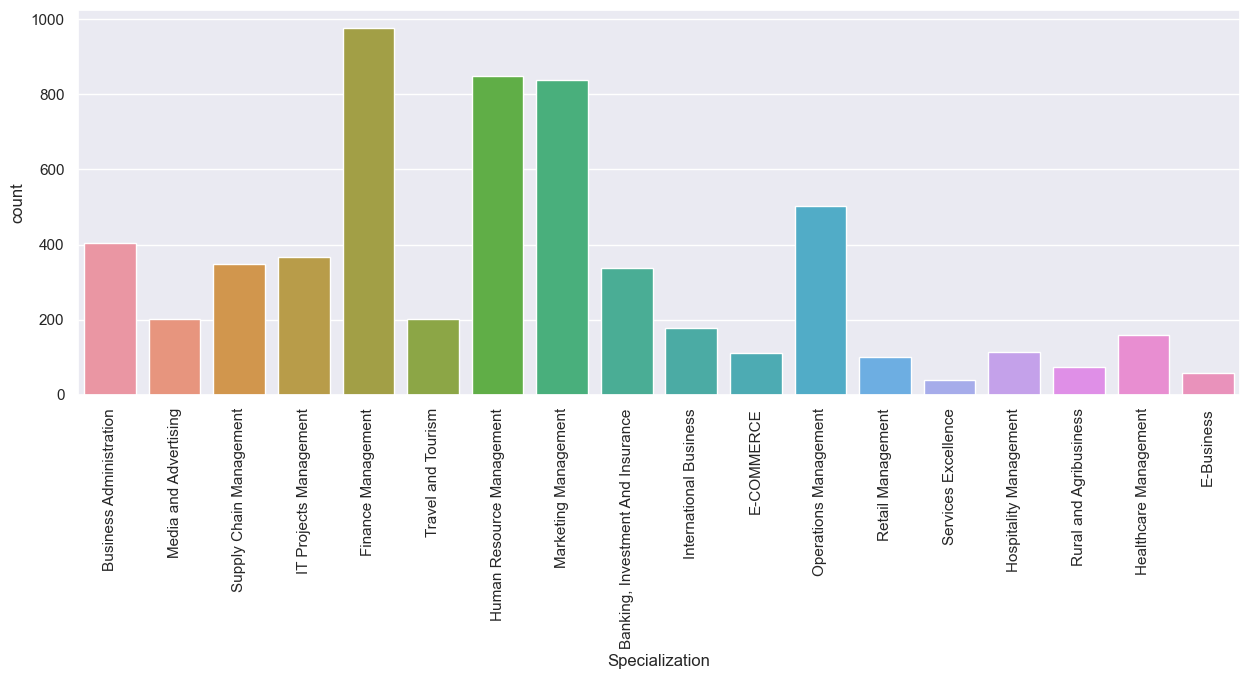

In [204]:
# Plotting count plot for 'Specialization' to see the data distribution


plt.figure(figsize=(15, 5))
sns.countplot(data=leadscore_df3, x='Specialization')
plt.xticks(rotation=90)
plt.show()


In [205]:
# Imputing missing value with 'Others'

leadscore_df3['Specialization'].fillna('Others',inplace=True)

In [206]:
# Listing all the columns having missing values into 'sparse_missing'

sparse_missing = leadscore_df3.columns[(100*(leadscore_df3.isnull().sum()/len(leadscore_df3)) < 30) & (100*(leadscore_df3.isnull().sum()/len(leadscore_df3)) >0) ]
print(sparse_missing)

Index(['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course'],
      dtype='object')


In [207]:
# Checking value counts of 'Lead Source'

leadscore_df3['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

Observation:
From above data, we can see that there are 'Google' and 'google'. Better to replace google with Google.
As 'Google' is having highest number occurances,we can impute missing values with 'Google'.

In [208]:
# Replace 'google' with 'Google'

leadscore_df3['Lead Source']=leadscore_df3['Lead Source'].replace('google','Google')
# Verifying value counts again:-

leadscore_df3['Lead Source'].value_counts()

Lead Source
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64

In [209]:
# Imputing missing values with 'Google'

leadscore_df3['Lead Source'].fillna('Google',inplace=True)

In [210]:
# Checking value counts of 'What is your current occupation' variable

leadscore_df3['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

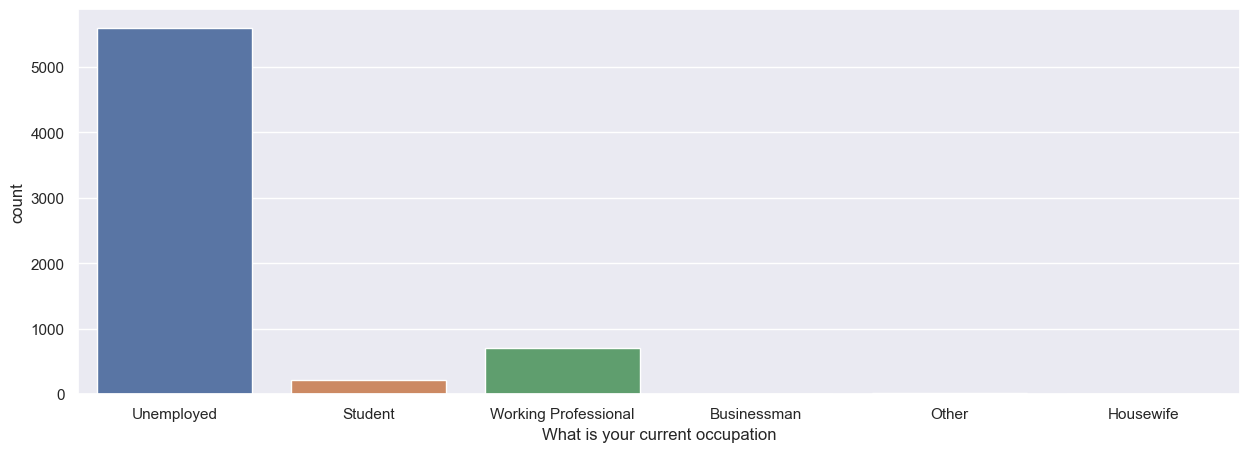

In [211]:
# Plotting count plot to check data counts in column 'What is your current occupation':-

plt.figure(figsize=(15,5))
sns.countplot(data=leadscore_df3, x='What is your current occupation')
plt.show()

Observation:

We see that 'Unemployed' count is highest but we will impute missing values with 'Not known' considering we do not know current occupation of lead.So we will create a separate category called 'Not known'.

In [212]:
# Imputing missing value with 'Not Known'

leadscore_df3['What is your current occupation'].fillna('Not known',inplace=True)

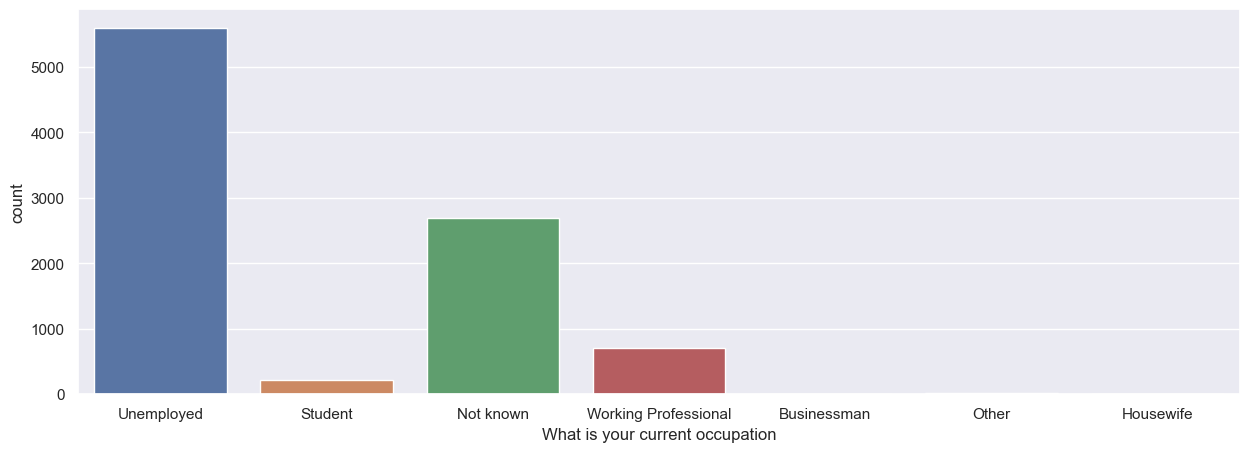

In [213]:
# Checking count of 'Others' after impuataion:-

plt.figure(figsize=(15,5))
sns.countplot(data=leadscore_df3, x='What is your current occupation')
plt.show()

In [214]:
# Checking value count of 'What matters most to you in choosing a course' variable
leadscore_df3['What matters most to you in choosing a course'].value_counts(normalize=True)*100

What matters most to you in choosing a course
Better Career Prospects     99.95
Flexibility & Convenience    0.03
Other                        0.02
Name: proportion, dtype: float64

Observation:
'Better Career Prospects' is the most frequent value so we can replace missing value with 'Better Career Prospects'.

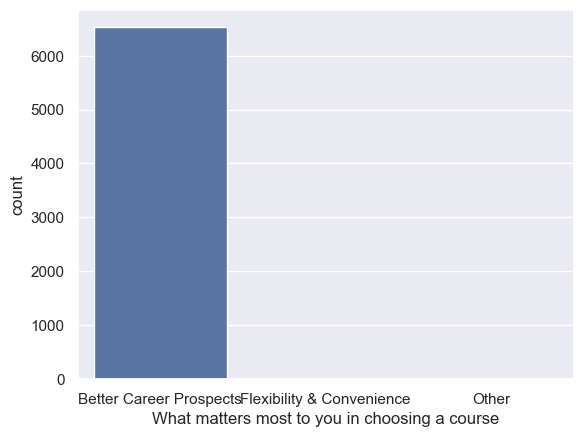

In [215]:
# Verifying counts by plotting count plot

sns.countplot(data=leadscore_df3, x='What matters most to you in choosing a course')
plt.show()

In [216]:
# Checking value counts of 'Country' column

leadscore_df3.Country.value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

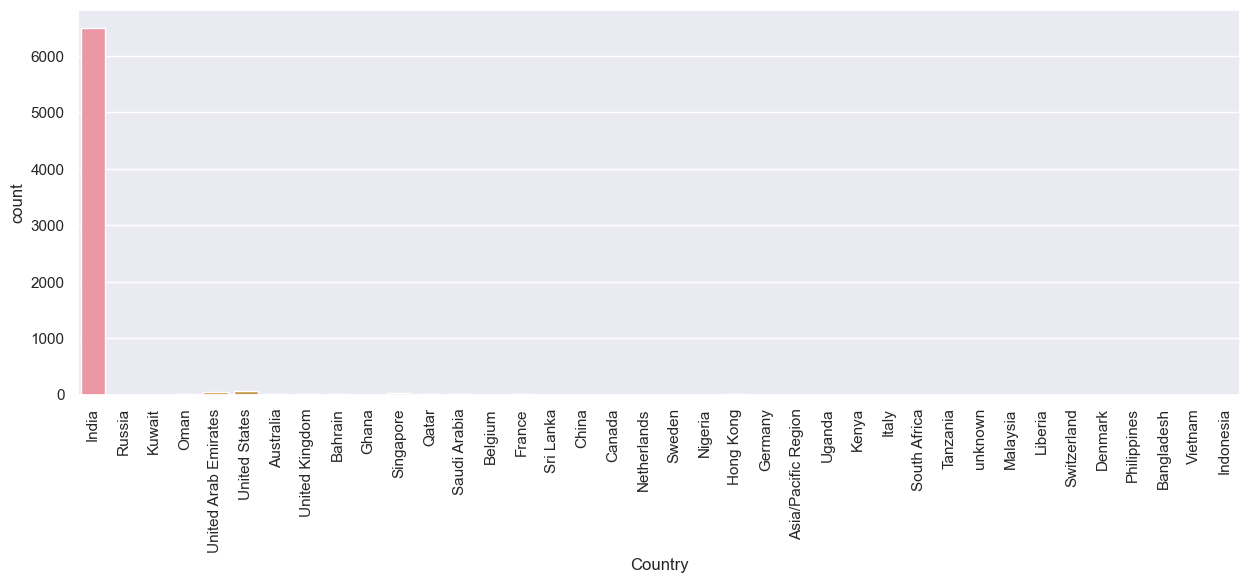

In [217]:
# Plotting count plot to visualize counts of data of 'Country' column

plt.figure(figsize=(15,5))
sns.countplot(data=leadscore_df3,x='Country')
plt.xticks(rotation=90)
plt.show()

Observation: We can impute the null values with 'India' as it is the highest one in the country column.

In [218]:
# Replacing missing values with most frequent value 'India' in categorical column 'Country'

leadscore_df3.Country.fillna('India',inplace=True)
leadscore_df3.Country.value_counts()

Country
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

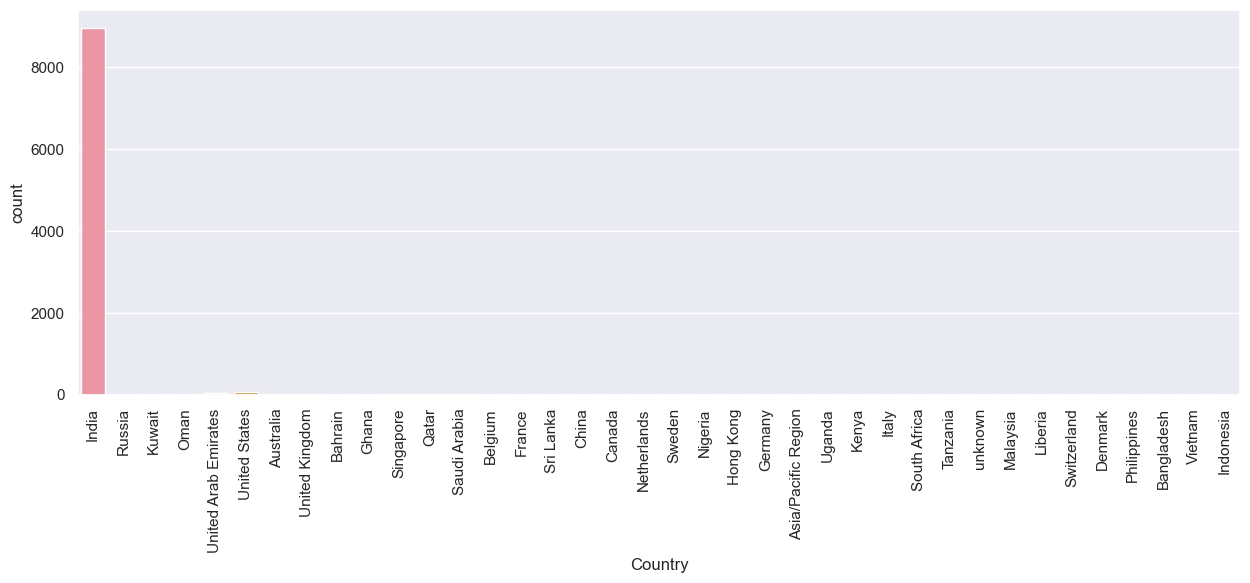

In [219]:
#plot after imputing values 

plt.figure(figsize=(15,5))
sns.countplot(data=leadscore_df3,x='Country')
plt.xticks(rotation=90)
plt.show()

Observation: The data is skewed here which will not help in the analysis. So, dropping the column country here.

In [220]:
#Dropping 'Country' column from dataframe

leadscore_df3.drop('Country',axis=1,inplace=True)


### Handling ~1% missing value columns

In [221]:
# Checking value counts of 'Last Activity'

leadscore_df3['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

 Observation:
As we do not know the last activity of leads which are missing values and most frequent value is 'Email Opened' so we can impute missing value with 'Email Opened'.

In [222]:
# Imputing missing values with 'Email Opened'

leadscore_df3['Last Activity'] = leadscore_df3['Last Activity'].replace(np.nan, 'Email Opened')

In [223]:
# Imputing missing value with 'median' value for both 'TotalVisits' and 'Page Views Per Visit' columns:-

leadscore_df3['TotalVisits'].fillna(leadscore_df3['TotalVisits'].median(), inplace=True)

leadscore_df3['Page Views Per Visit'].fillna(leadscore_df3['Page Views Per Visit'].median(), inplace=True)

In [224]:
leadscore_df3.shape

(9240, 27)

In [225]:
round(100*(leadscore_df3.isnull().sum()/len(leadscore_df3)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

#### Checking 'Prospect ID' and 'Lead Number' columns

In [226]:
# Checking duplicate values in 'Prospect ID'

leadscore_df3.duplicated(subset = 'Prospect ID').sum()

0

In [227]:
# Checking duplicate values in 'Lead Number'

leadscore_df3.duplicated(subset = 'Lead Number').sum()

0

Observation:

'Prospect ID' and 'Lead Number' both do not have duplicate values means these columns identify each data uniquely so working as unique Id and will not make any significant impact on our model.So we can drop it.

In [228]:
# Dropping 'Prospect ID' and 'Lead Number' variables

leadscore_df3.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

#### Value_counts of variables to check data balancing

In [229]:
# Checking the value_counts of remaining variables for better data understanding

cols=list(leadscore_df3.iloc[:,:])  # Creating list 'cols' of variables


for i in cols:
    print(i,'=====')
    print(leadscore_df3[i].value_counts(), '\n')

Lead Origin =====
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64 

Lead Source =====
Lead Source
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: count, dtype: int64 

Do Not Email =====
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64 

Do Not Call =====
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64 

Converted =====
Converted
0    5679
1 

Observation:

From the above value_counts data we can see that columns 'Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','
Get updates on DM Content','I agree to pay the amount through cheque' are having highly imbalance data or skewed data and these variables will not contribute significatly to analysis ,so better to drop these columns.

In [230]:
# Dropping variables which are having imbalanced data

leadscore_df3.drop(['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1,inplace=True)

In [231]:
# Dropping column 'last Notable Activity':-

leadscore_df3.drop('Last Notable Activity',axis=1,inplace=True)

In [232]:
# Checking shape of the dataframe after dropping variables:-

leadscore_df3.shape

(9240, 11)

In [233]:
# Displaying head of 'lead_df1' dataframe :-

leadscore_df3.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,No


### 3. EDA

#### Univariate Analysis

Accoriding to the problem, 'Converted' is the target variable.

'1' indicates successfully converted to lead.

'0' indicates not converted into lead.

In [234]:
# Calculating conversion rate

conversion_rate = (sum(leadscore_df3['Converted'])/len(leadscore_df3['Converted'].index))*100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 38.54%


In [235]:
# Checking Distribution of 'TARGET' Variable

converted_counts = leadscore_df3['Converted'].value_counts()
print("Converted counts:\n", converted_counts)

Converted counts:
 Converted
0    5679
1    3561
Name: count, dtype: int64


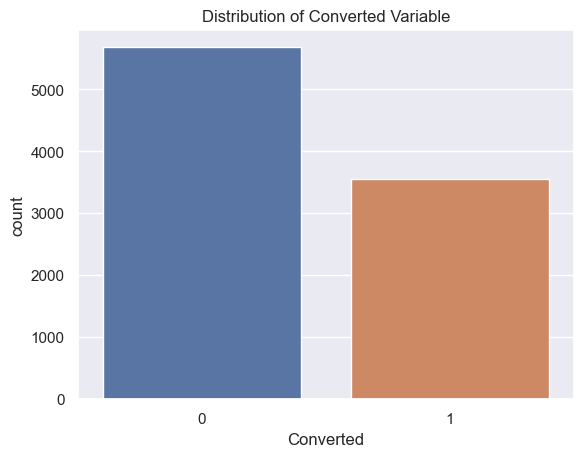

In [236]:
sns.countplot(data=leadscore_df3, x='Converted')
plt.title("Distribution of Converted Variable")
plt.show()

In [237]:
#Checking ratio of imbalance

(leadscore_df3.Converted==1).sum()/(leadscore_df3.Converted==0).sum()

0.6270470153195985

We can say the data is properly balanced with respect to ratio

In [238]:
leadscore_df3.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
dtype: object

#### Analyzing Categorical Variables

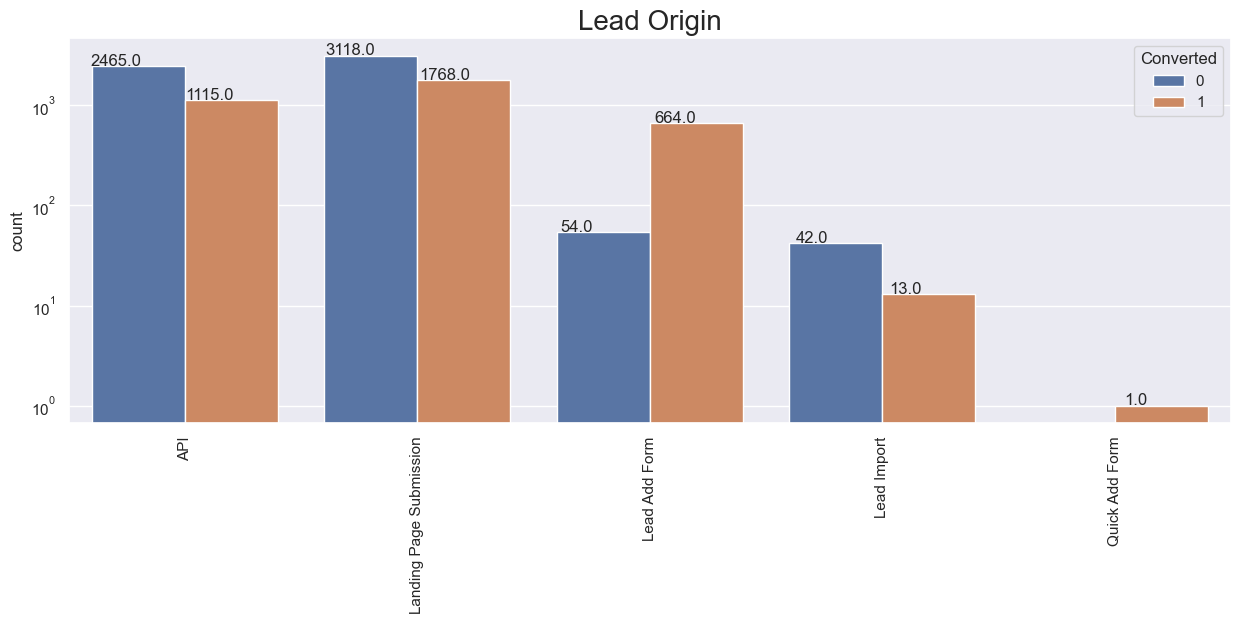

In [239]:
# Plotting count plot of 'Lead Origin' for both 'Converted' 0 and 1

plt.figure(figsize = (15,5))

ax=sns.countplot(x = "Lead Origin", hue = "Converted", data = leadscore_df3)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Origin',fontsize=20)
ax.set_yscale('log')

plt.show()

From the avobe count plot, we can observe the below:

Conversion rates:
   API - 31% (approx)
   Landing Page submission - 36%(approx)
count of Lead import is lesser


Conclusion:

To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form.



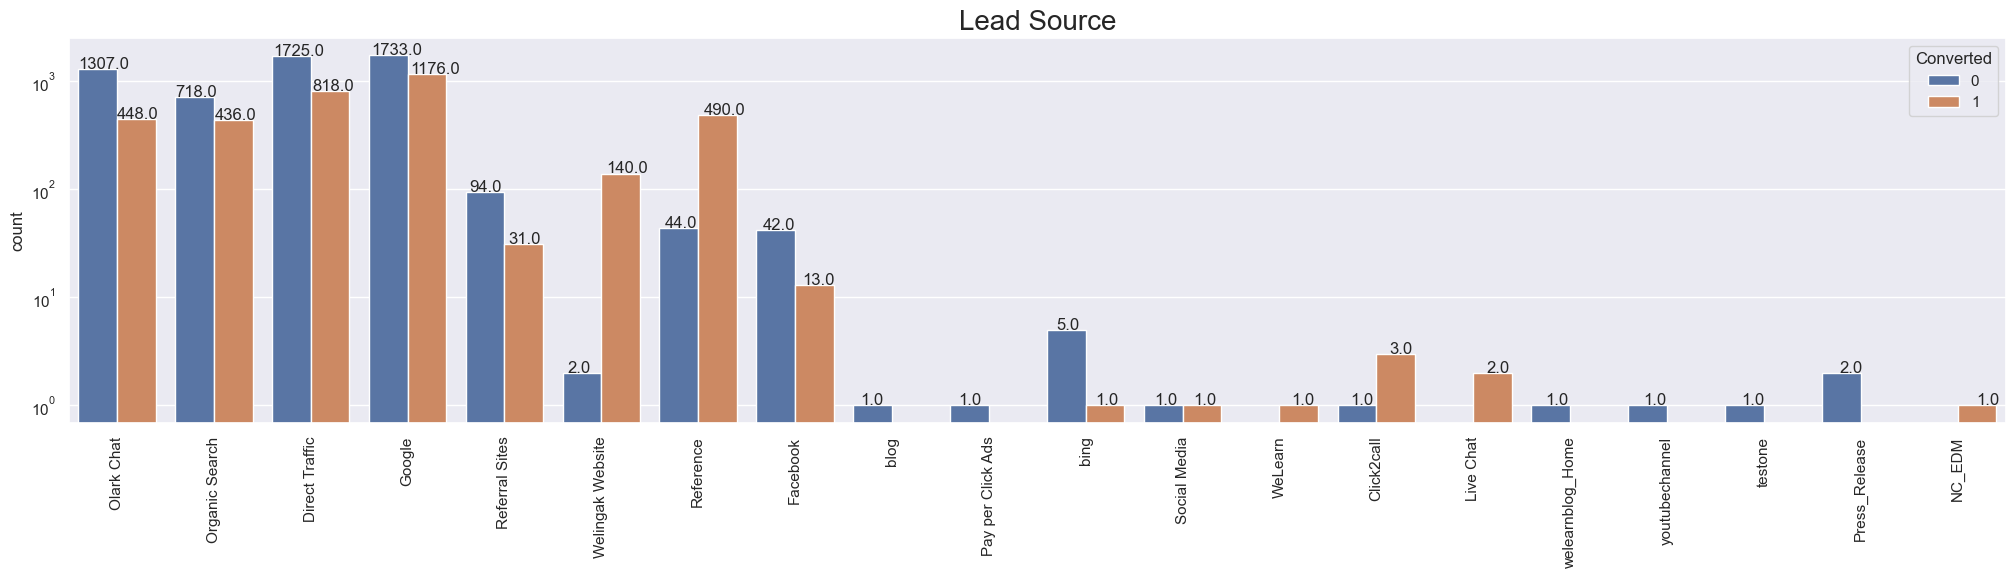

In [240]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = leadscore_df3)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [241]:
#As there are many values which are occuring in a lower frequency,clubbing them under the name 'others'

leadscore_df3['Lead Source'] = leadscore_df3['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call', 'Live Chat','welearnblog_Home', 'youtubechannel','testone',
                                                           'Press_Release','NC_EDM'], 'Others')

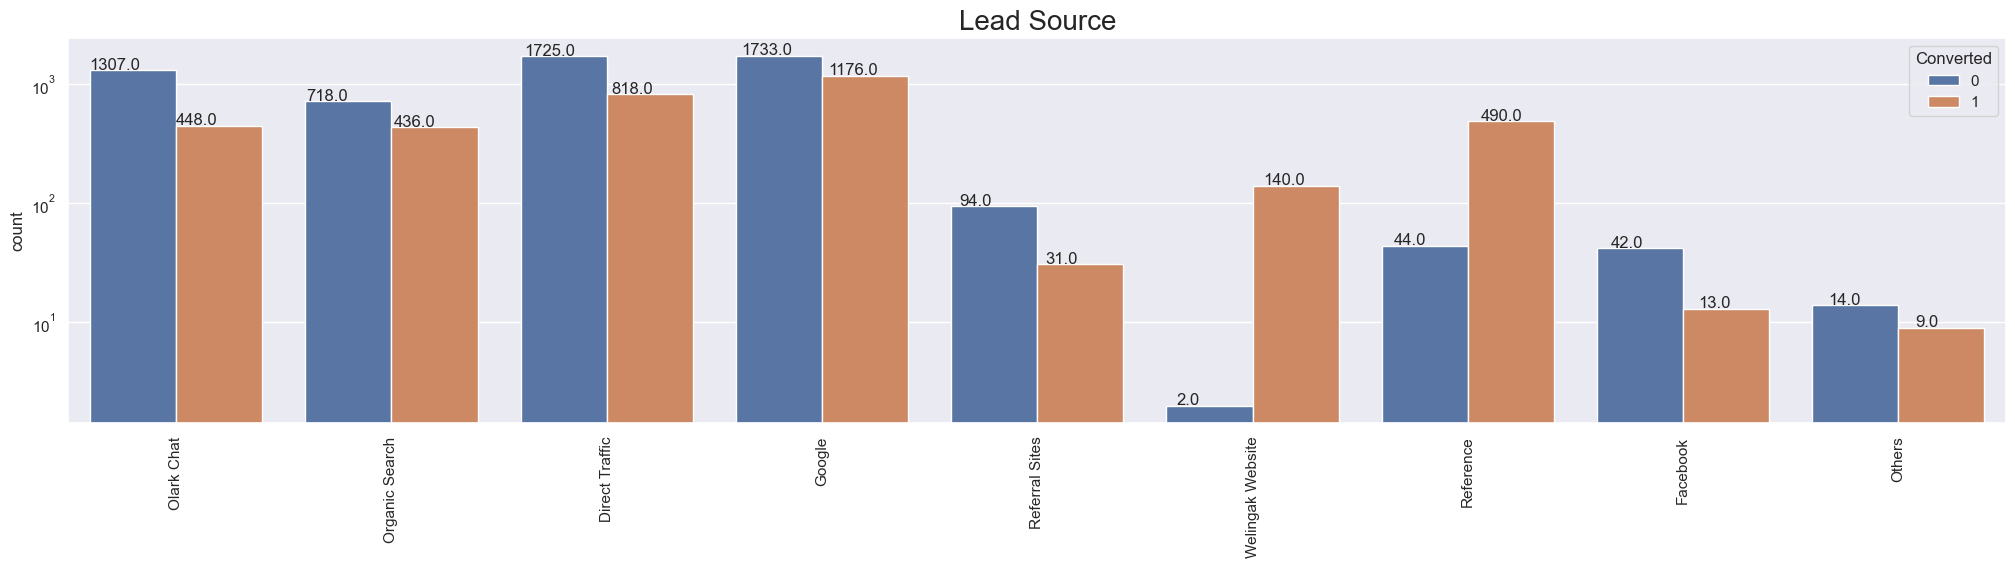

In [242]:
# Again plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Lead Source", hue = "Converted", data = leadscore_df3)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Lead Source',fontsize=20)

ax.set_yscale('log')

plt.show()

From the above plot, we can see that:
    1. Google and Direct traffic generates maximum number of leads.
    2 .Conversion rate of 'Reference' and 'Welingak Website' leads is high.

Recommendation:
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, 
organic search, direct traffic, and google leads and generate more leads from reference and welingak 
website.

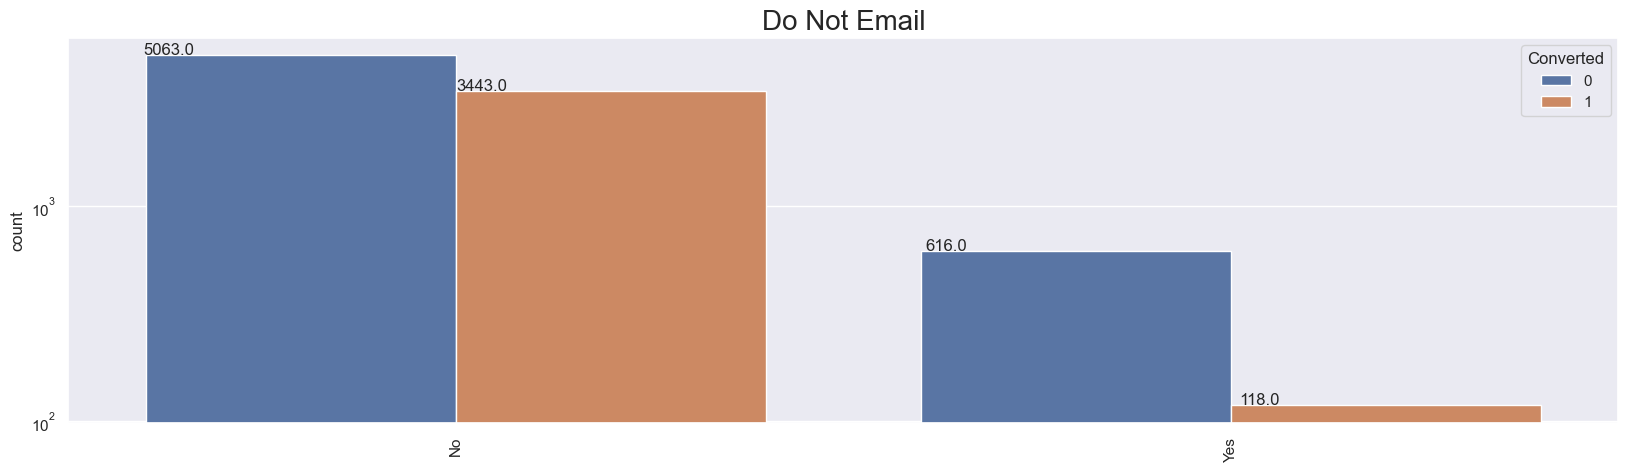

In [243]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Do Not Email", hue = "Converted", data = leadscore_df3)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Do Not Email',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

So we can say, people opted for email option are becoming more leads.

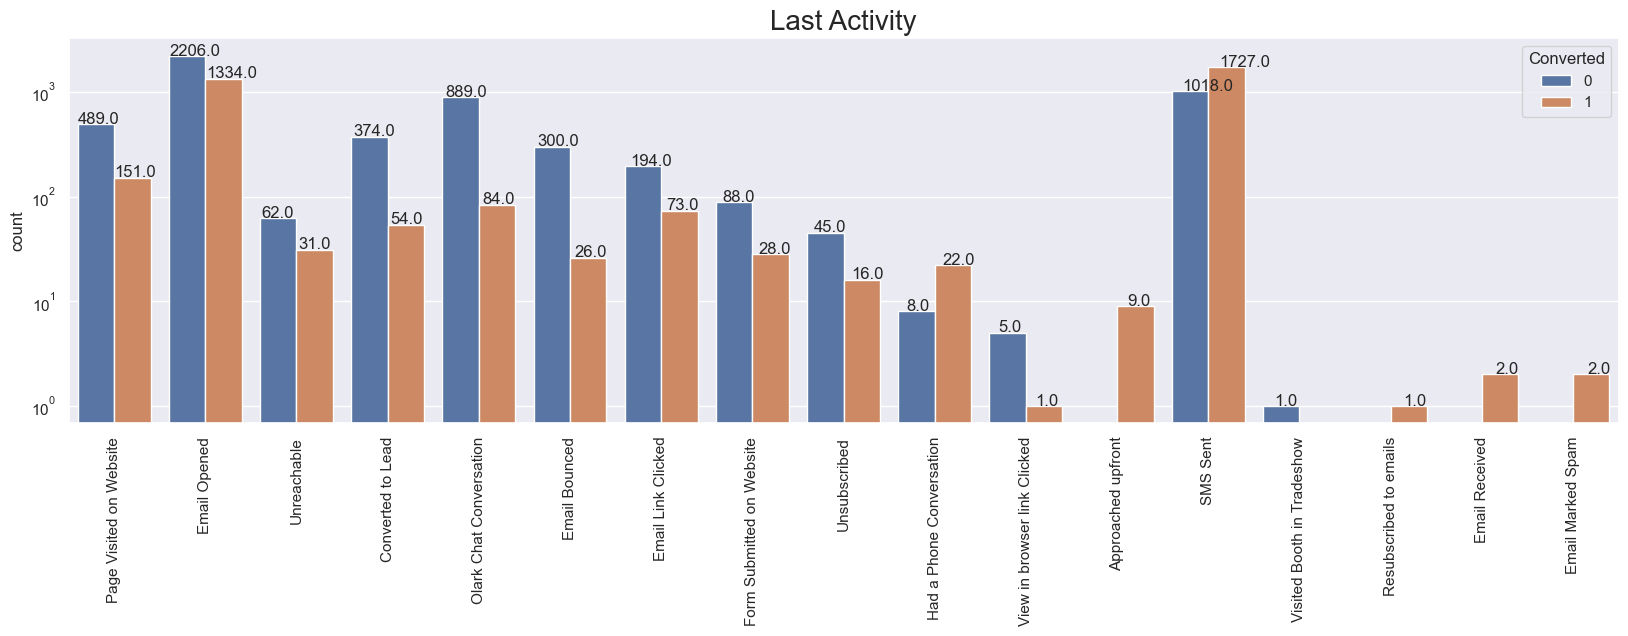

In [244]:
# Plotting count plot of 'Lead Source' based on 'Converted' value 0 and 1

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = leadscore_df3)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

In [245]:
# Combining all low frequency values together under label 'Others':-

leadscore_df3['Last Activity'] = leadscore_df3['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow',
      'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Others')

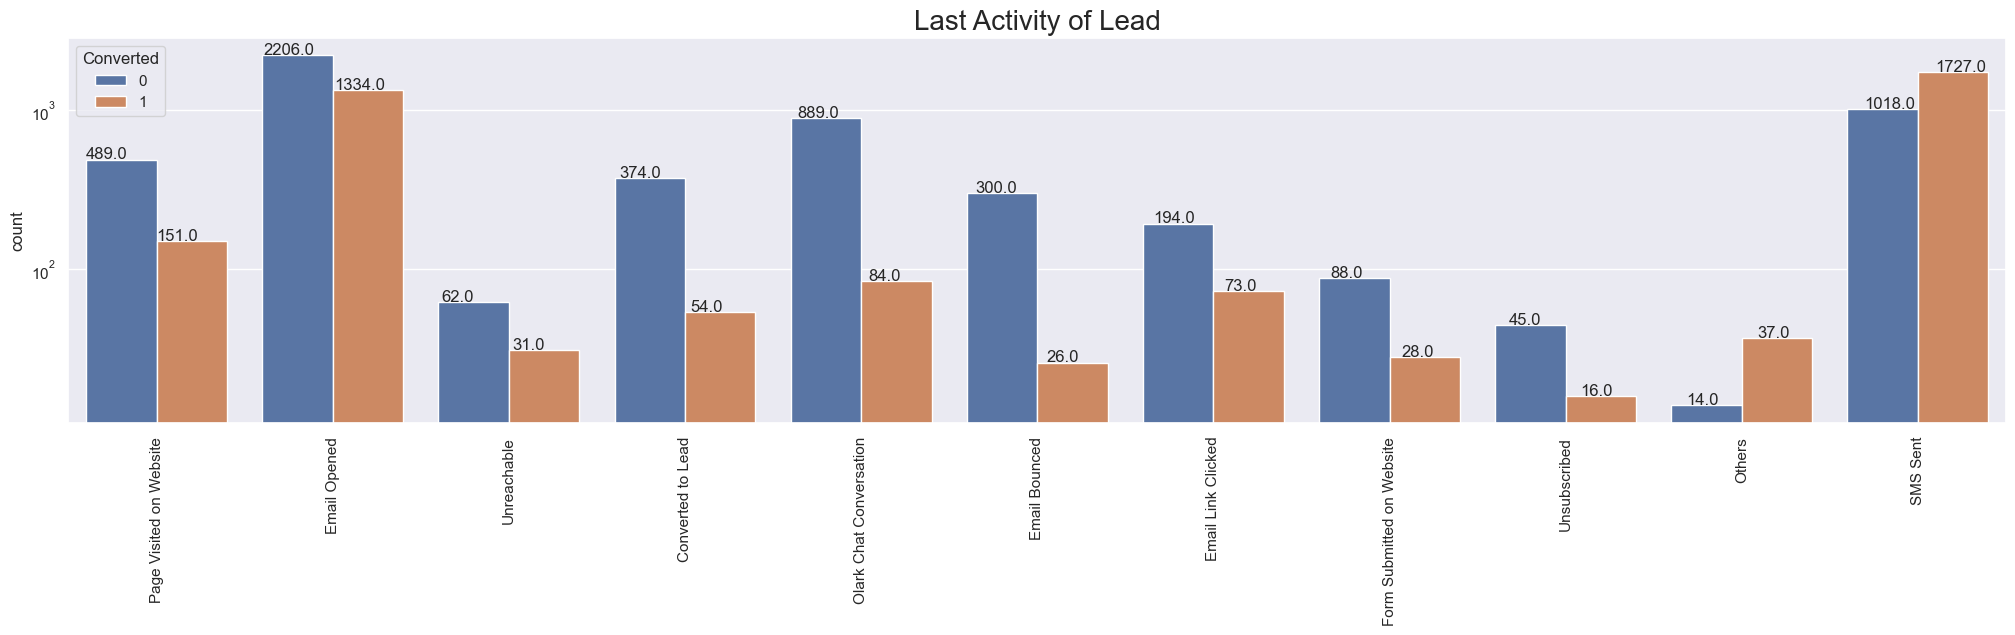

In [246]:
# Again plotting count plot of 'Last Activity' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (25,5))

ax=sns.countplot(x = "Last Activity", hue = "Converted", data = leadscore_df3)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Last Activity of Lead',fontsize=20)

ax.set_yscale('log')

plt.show()

Observation:

From above plot we can observe :

Conversion rate for last activity of 'SMS Sent'is ~63%.

Highest last activity of leads is 'Email Opened'.

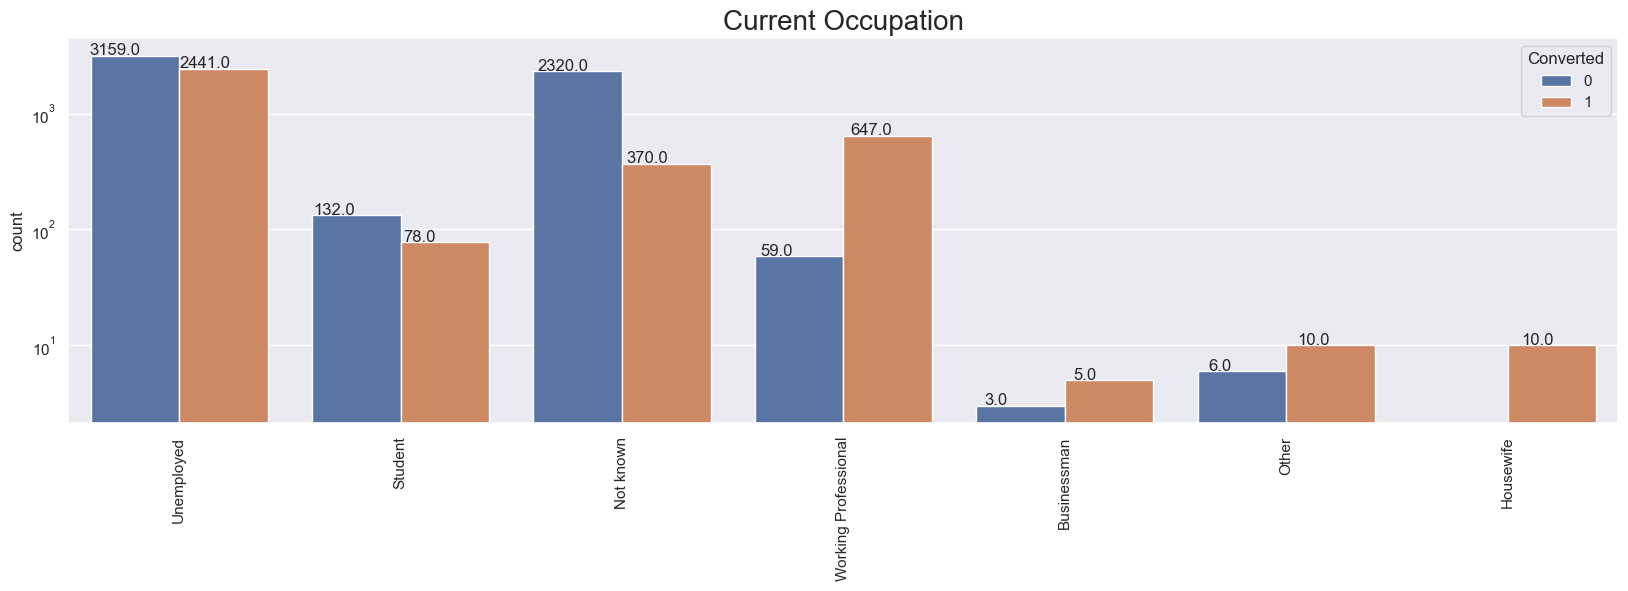

In [247]:
# Plotting count plot of 'What is your current occupation' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "What is your current occupation", hue = "Converted", data = leadscore_df3)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Current Occupation',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

Observation:

'Unemployed' leads are generationg more number of leads and having ~45% conversion rate.

Conversion rate is higher for 'Working Professionals' .

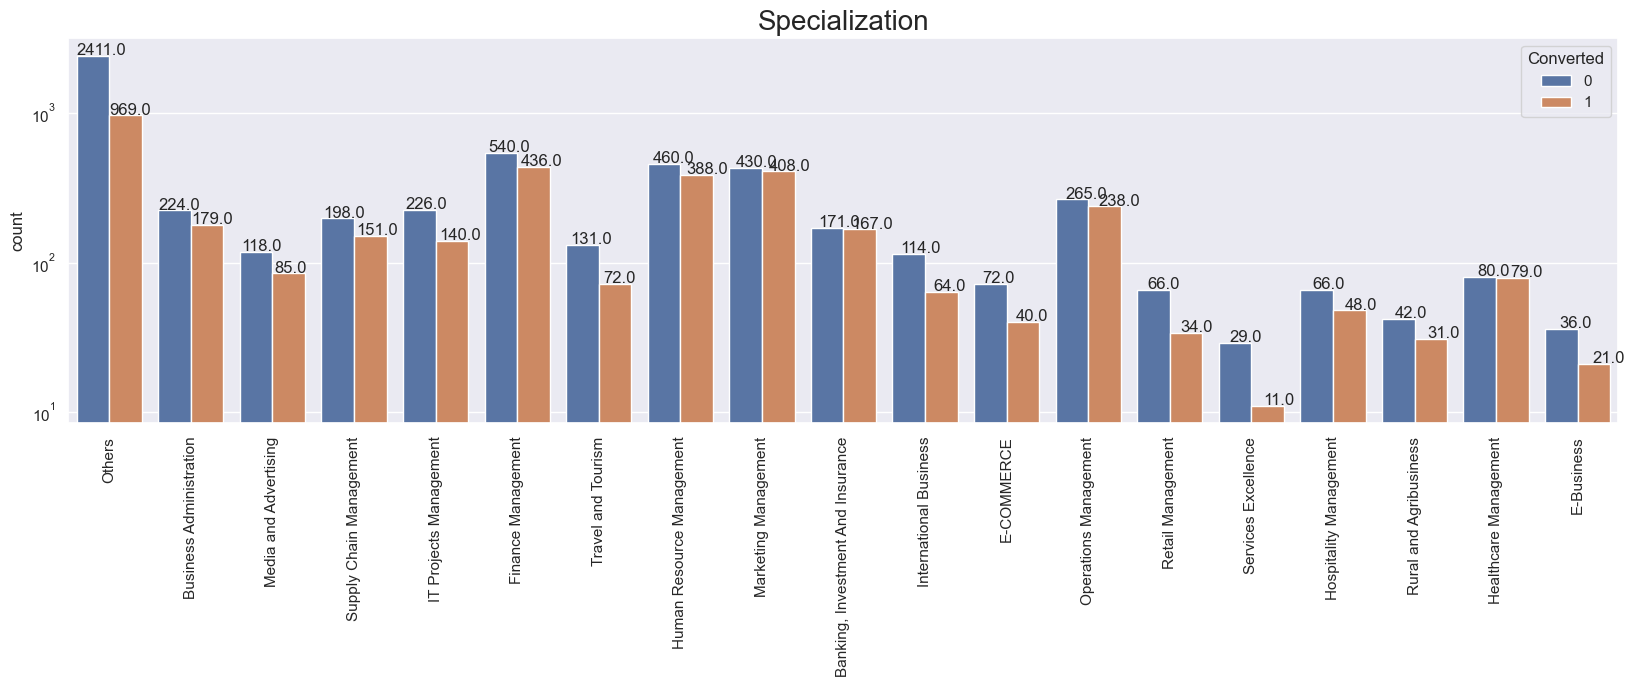

In [248]:
# Plotting count plot of 'Specialization' based on 'Converted' value 0 and 1 :-

plt.figure(figsize = (20,5))

ax=sns.countplot(x = "Specialization", hue = "Converted", data = leadscore_df3)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel=None)

plt.xticks(rotation = 90)
plt.title('Specialization',fontsize=20)

ax.set_yscale('log')# Setting logrithmic scale

plt.show()

Observation:
    
We can observe from above count plot of 'Specialization' that 'Management' specialization altogether
having more number of leads generating.And Other category is also generating more number of leads.

#### Analyzing Numerical Variables

#### Outlier Analysis and treatment

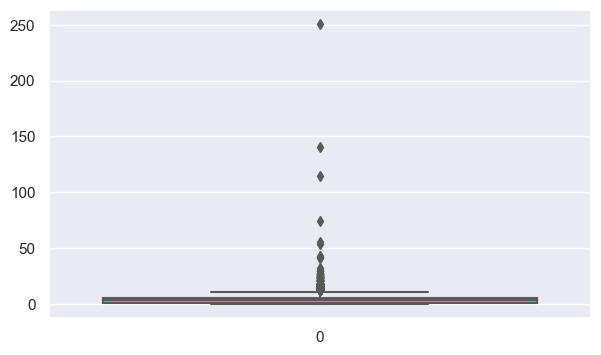

In [249]:
# Plotting box plots to visualize data distribution of 'TotalVisits':-

plt.figure(figsize = (7,4))
sns.boxplot(leadscore_df3['TotalVisits'],orient='v',palette='Set2')

plt.show()

Only upper range outliers are present in the data,so outliers needs to be treated.

In [250]:
# Treating outliers by capping upper range to 0.99:-

Q3 = leadscore_df3.TotalVisits.quantile(0.99)

leadscore_df3 = leadscore_df3[(leadscore_df3.TotalVisits <= Q3)]

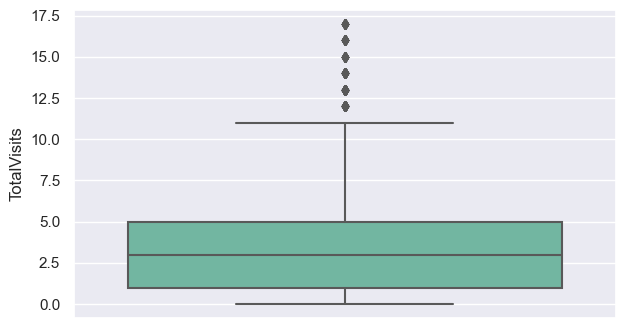

In [251]:
# Verifying outliers after removing it :-

plt.figure(figsize = (7,4))
sns.boxplot(y=leadscore_df3['TotalVisits'],palette='Set2')
plt.show()

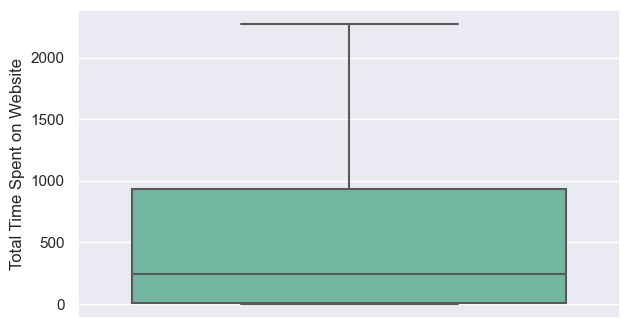

In [252]:
# Plotting box plots to visualize data distribution of 'Total Time Spent on Website'

plt.figure(figsize=(7,4))
sns.boxplot(y=leadscore_df3['Total Time Spent on Website'],orient='v',palette='Set2')
plt.show()

No outlier, hence no need to treat

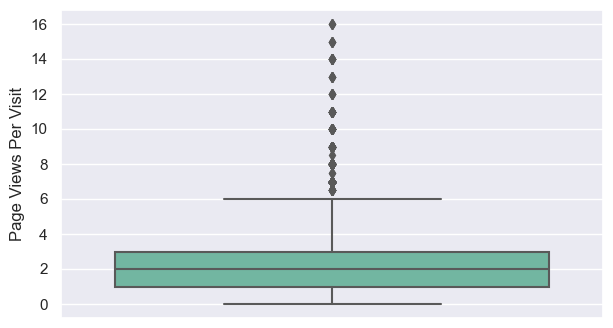

In [253]:
# Plotting box plots to visualize data distribution of 'Page Views Per Visit'

plt.figure(figsize=(7,4))
sns.boxplot(y=leadscore_df3['Page Views Per Visit'],orient='v',palette='Set2')
plt.show()

We can see that there are outliers in upper range which needs to be treated.

In [254]:
# Treating upper range outliers by capping upper range to 0.99

Q3 = leadscore_df3['Page Views Per Visit'].quantile(0.99)

leadscore_df3 = leadscore_df3[(leadscore_df3['Page Views Per Visit'] <= Q3)]

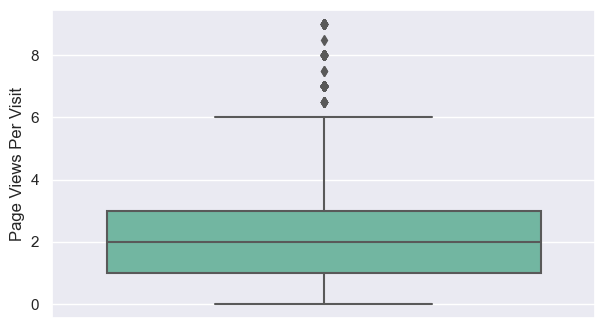

In [255]:
# Verifying outliers after removing it :-

plt.figure(figsize = (7,4))
sns.boxplot(y=leadscore_df3['Page Views Per Visit'],palette='Set2')
plt.show()

### Bivariate Analysis 

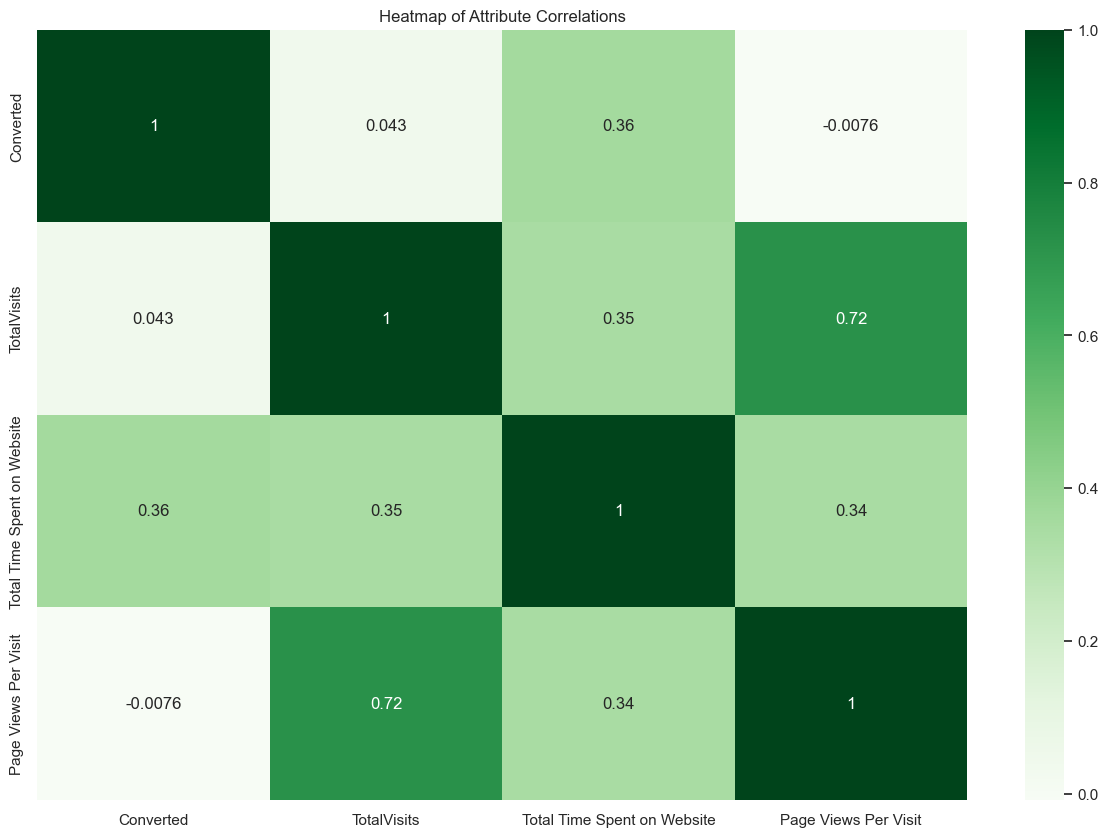

In [256]:
# Heatmap to understand the attributes correlation:-

# Select only numeric columns
numeric_df = leadscore_df3.select_dtypes(include=[float, int])

# Generate the heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens')
plt.title('Heatmap of Attribute Correlations')
plt.show()


Observations:

1 . 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .72 ..

2.  'Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.
    

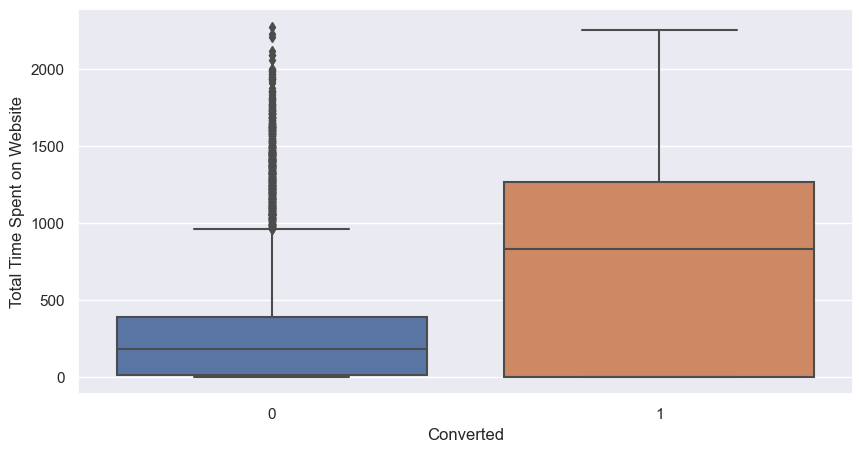

In [257]:
# Plotting box plot of "Total Time Spent on Website" vs Converted variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=leadscore_df3)
plt.show()

Observation:
    

Leads spending more time on website are more likely to opt for curses or converted.



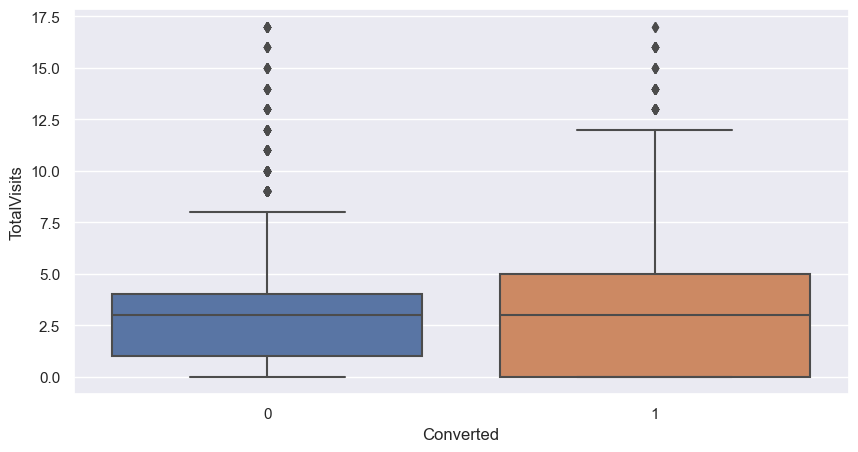

In [258]:
# Plotting box of "Total Visits" vs Converted variable to check data distribution:-

plt.figure(figsize=(10,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leadscore_df3)
plt.show()

Observation:

From above plot we can see that median for converted and non-converted is approx same.

### 4. Data Preparation

#### Converting binary values (yes/No) to 0/1

In [259]:
# Variable to map:-

var =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable:-

leadscore_df3[var] = leadscore_df3[var].apply(binary_map)

In [260]:
# Checking head of dataframe again:-

leadscore_df3.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.00,674,2.50,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.00,1532,2.00,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,0


In [261]:


# List of categorical columns that need label encoding
categorical_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation']

# Creating a LabelEncoder object
encoder = LabelEncoder()

# Applying the encoder to each categorical column
for column in categorical_cols:
    leadscore_df3[column] = encoder.fit_transform(leadscore_df3[column])


In [262]:
leadscore_df3.info

<bound method DataFrame.info of       Lead Origin  Lead Source  Do Not Email  Converted  TotalVisits  \
0               0            3             0          0         0.00   
1               0            4             0          0         5.00   
2               1            0             0          1         2.00   
3               1            0             0          0         1.00   
4               1            2             0          1         2.00   
...           ...          ...           ...        ...          ...   
9235            1            0             1          1         8.00   
9236            1            0             0          0         2.00   
9237            1            0             1          0         2.00   
9238            1            2             0          1         3.00   
9239            1            0             0          1         6.00   

      Total Time Spent on Website  Page Views Per Visit  Last Activity  \
0                            

### Test-Train  split

In [263]:
# Importing required library to split data:-

from sklearn.model_selection import train_test_split


In [264]:
# Putting feature variable to X

X = leadscore_df3.drop(['Converted'], axis=1)

# Displaying head :-

X.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,0,3,0,0.00,0,0.00,7,13,5,0
1,0,4,0,5.00,674,2.50,3,13,5,0
2,1,0,0,2.00,1532,2.00,3,1,4,1
3,1,0,0,1.00,305,1.00,9,11,5,0
4,1,2,0,2.00,1428,1.00,0,13,5,0


In [265]:
# Putting response variable to y

y = leadscore_df3['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [266]:
# Splitting the data into train and test of 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [267]:
# Checking shape of 'X_train' dataset after splitting

X_train.shape

(6363, 10)

In [268]:
# Checking shape of 'X_test' dataset after splitting:-

X_test.shape

(2727, 10)

In [269]:
# Verifying info of data set after splitting

leadscore_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9090 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9090 non-null   int32  
 1   Lead Source                             9090 non-null   int32  
 2   Do Not Email                            9090 non-null   int64  
 3   Converted                               9090 non-null   int64  
 4   TotalVisits                             9090 non-null   float64
 5   Total Time Spent on Website             9090 non-null   int64  
 6   Page Views Per Visit                    9090 non-null   float64
 7   Last Activity                           9090 non-null   int32  
 8   Specialization                          9090 non-null   int32  
 9   What is your current occupation         9090 non-null   int32  
 10  A free copy of Mastering The Interview  9090 non-null   int64  
d

### 6. Feature Scaling

In [270]:
##Importing required library for scaling

from sklearn.preprocessing import StandardScaler

In [271]:
# Creating 'scaler' object for 'StandardScaler':-

scaler = StandardScaler()

# Applying 'fit_transform' to scale the 'train' data set:-

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

# Displaying the head of the data after scaling:-
X_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
302,0,7,0,1.34,-0.43,0.04,3,13,2,0
6087,0,3,1,-1.09,-0.89,-1.21,1,13,2,0
1033,0,2,0,0.64,-0.03,1.48,3,13,5,0
7656,1,0,1,0.99,-0.24,2.01,8,4,5,1
3241,1,0,0,0.29,0.90,-0.49,8,1,5,1


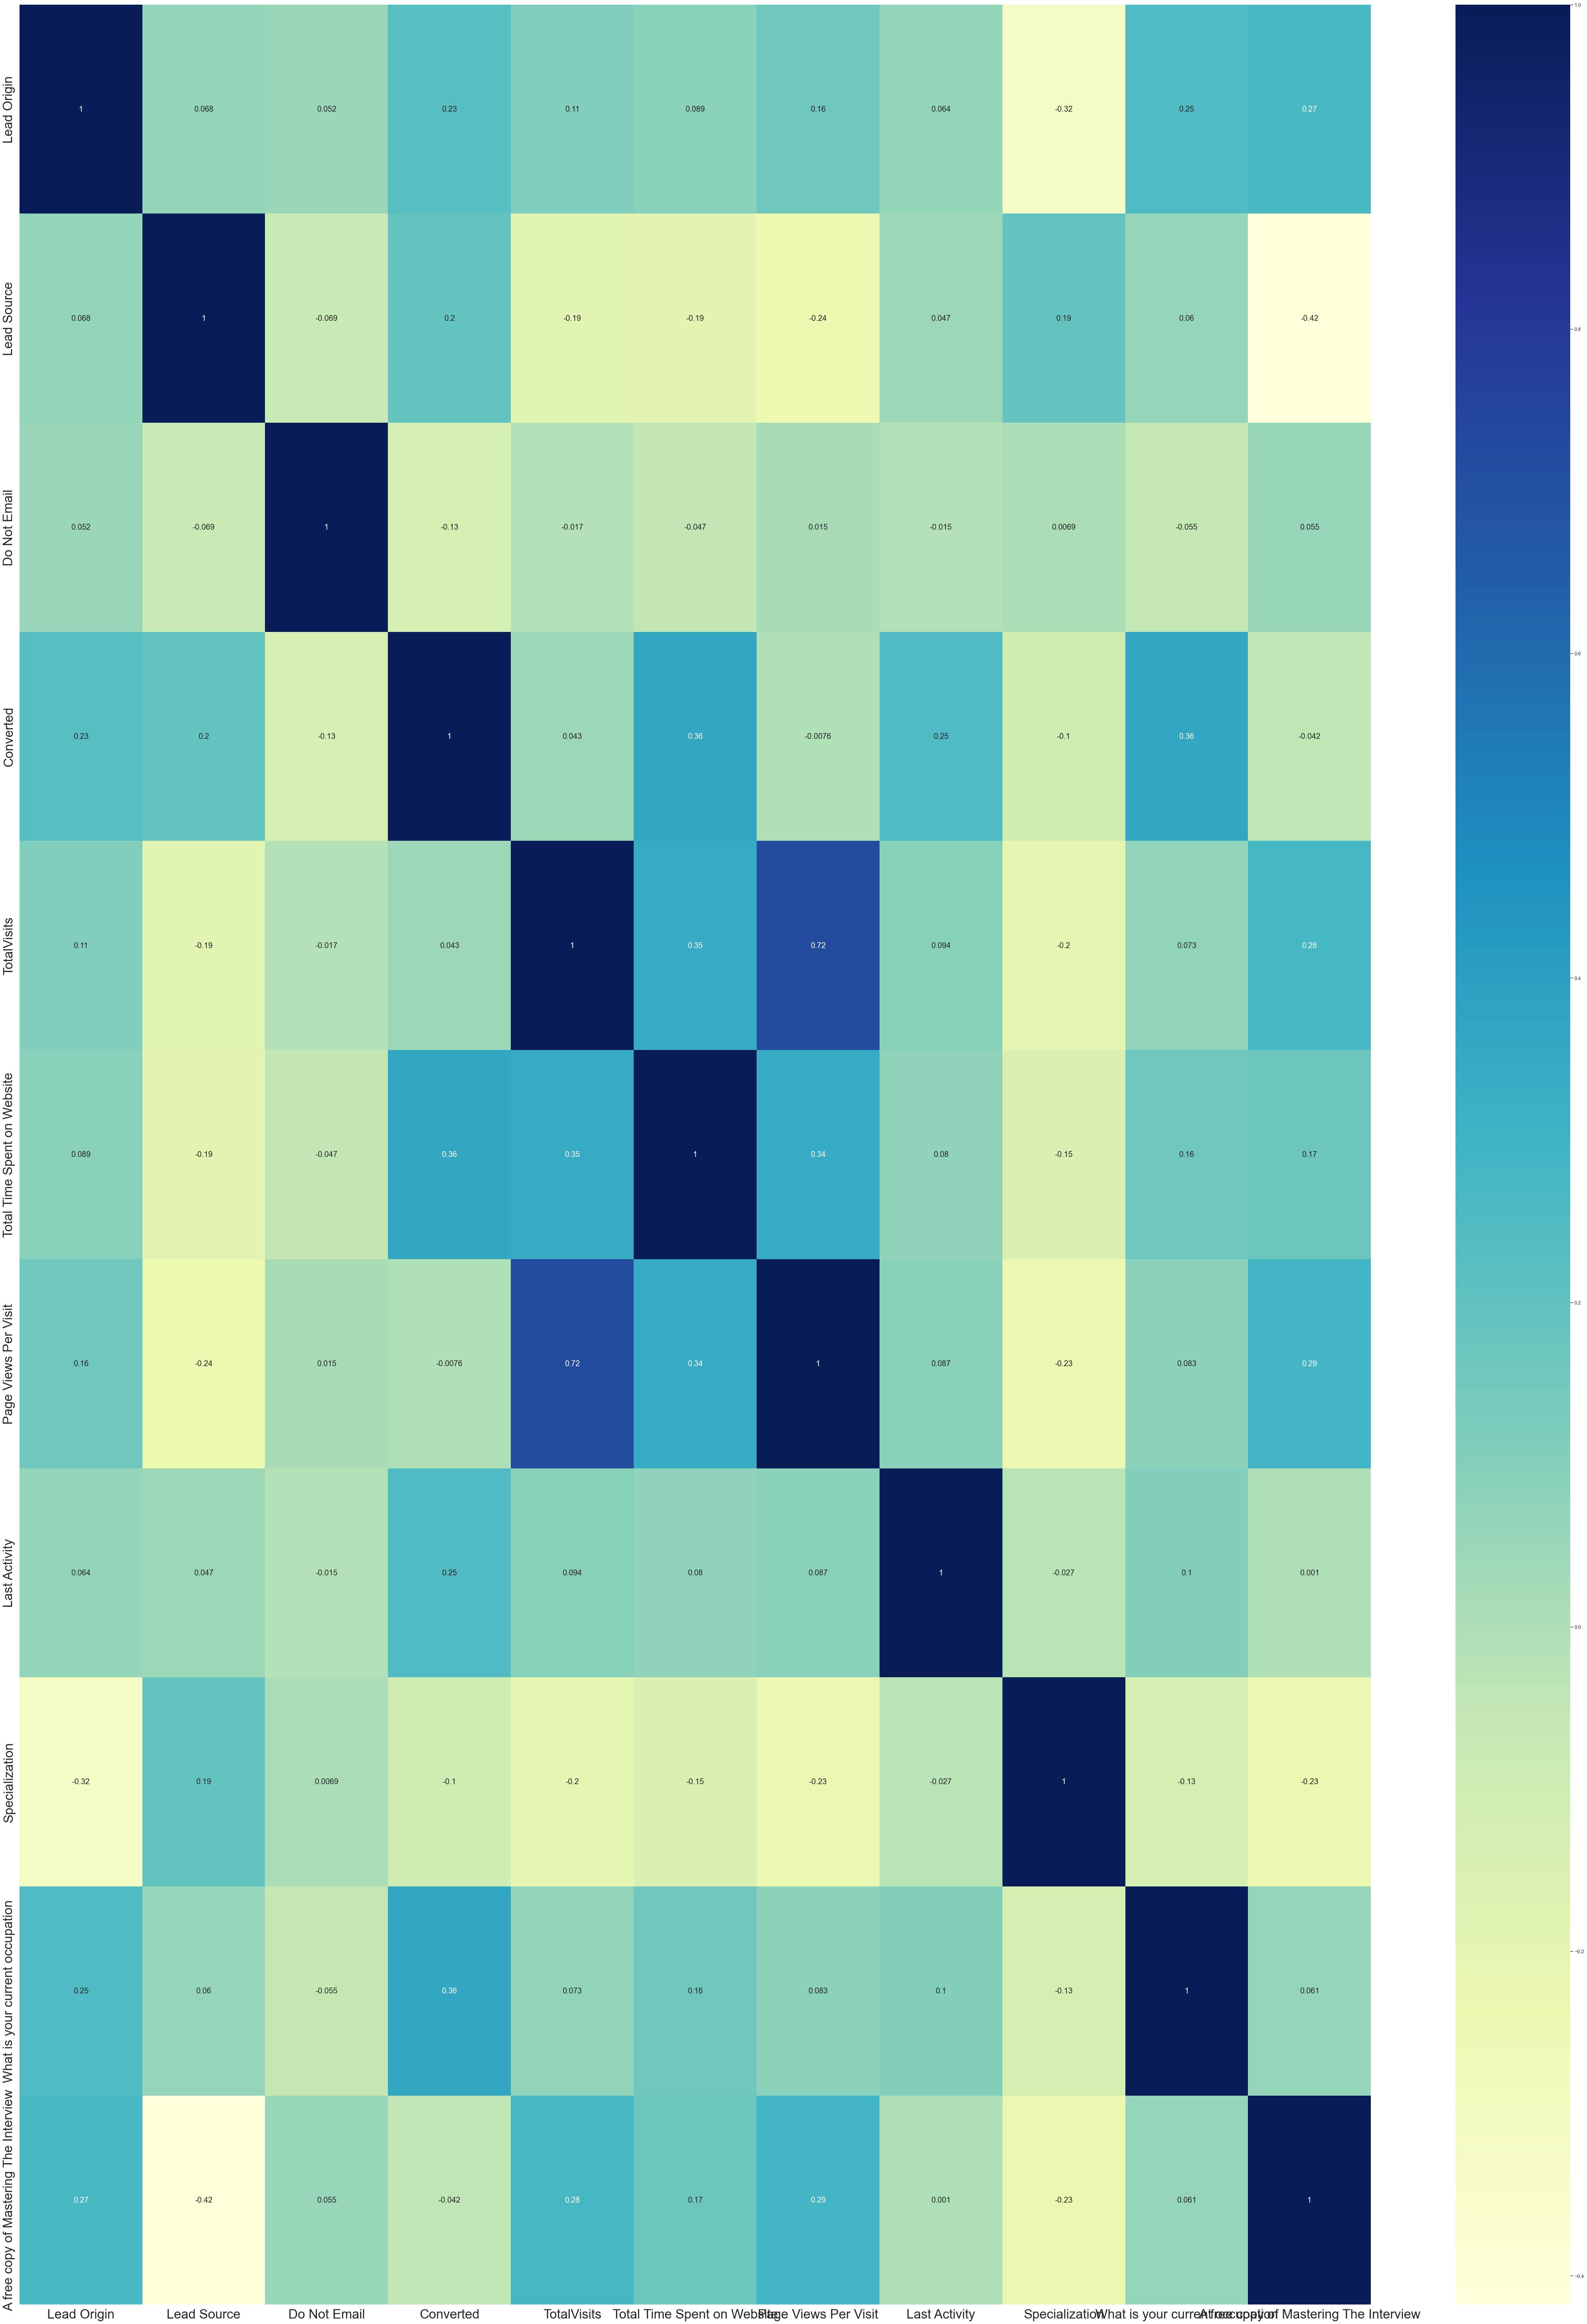

In [272]:
#Checking the Correlation Matrix

# Let's check the correlation coefficients to see which variables are highly correlated:-

plt.figure(figsize = (55, 75),dpi=80)
sns.heatmap(leadscore_df3.corr(), annot = True, cmap="YlGnBu",annot_kws={"size": 18})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

Observation:


The heatmap clearly shows the variables that are multicollinear in nature, and which variables have high collinearity with the target variable. - We will refer this map for building the logistic model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.


### 7. Model Building


Stats model and RFE

In [273]:
#Importing 'LogisticRegression'

from sklearn.linear_model import LogisticRegression

# Creating LogisticRegression Object called 'regressor'

regressor = LogisticRegression()

In [274]:
#Importing 'RFE' for feature selection

from sklearn.feature_selection import RFE

# Creating RFE object with 15 variables to select
rfe = RFE(estimator=regressor, n_features_to_select=15)

# Running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [275]:
#Displaying columns selected by RFE and their weights

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Specialization', True, 1),
 ('What is your current occupation', True, 1),
 ('A free copy of Mastering The Interview', True, 1)]

In [276]:
# Storing columns selected by RFE into 'col' and displaying it:-

col = X_train.columns[rfe.support_]
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [277]:
# Displaying columns which are not selected by RFE:-

X_train.columns[~rfe.support_]

Index([], dtype='object')

In [278]:
# Creating X_test dataframe with RFE selected variables:-

X_train_rfe = X_train[col]

#### Using manual feature elimination

### Model 1

In [279]:
#Importing required 'statsmodels' library:-

import statsmodels.api as sm

In [280]:
# Add a constant:-

X_train_sm = sm.add_constant(X_train_rfe)

# Building first fitted model:-

logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()

In [281]:
# Print a summary of the logistic regression model obtained:-

logm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2900.0
Date:                Tue, 23 Jul 2024   Deviance:                       5800.0
Time:                        16:47:33   Pearson chi2:                 6.46e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3417
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -4.7048      0.175    -26.921      0.000      -5.047      -4.362
Lead Origin                                0.5634      0.058      9.780      0.000       0.450       0.676
Lead Source                                0.2687      0.020     13.114      0.000       0.229       0.309
Do Not Email                              -1.4221      0.155     -9.189      0.000      -1.725      -1.119
TotalVisits                                0.0505      0.045      1.111      0.266      -0.039       0.140
Total Time Spent on Website                1.0081      0.037     27.157      0.000       0.935       1.081
Page Views Per Visit                      -0.4463      0.048     -9.228      0.000      -0.541      -0.352
Last Activity                              0.2272      0.013     17.458      0.000       0.202       0.253
Specialization                            -0.0256      0.008     -3.311      0.001      -0.041      -0.010
What is your current occupation            0.5535      0.027     20.478      0.000       0.501       0.606
A free copy of Mastering The Interview    -0.2692      0.082     -3.265      0.001      -0.431      -0.108
==========================================================================================================
"""

#### VIF Check for multicollinearity : variance_inflation_factor

In [282]:
# Importing 'variance_inflation_factor' from 'statsmodels'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [283]:
# Creating dataframe called 'vif' containing names feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation,6.91
7,Specialization,4.56
6,Last Activity,4.09
1,Lead Source,3.27
0,Lead Origin,2.87
5,Page Views Per Visit,2.16
3,TotalVisits,2.12
9,A free copy of Mastering The Interview,1.91
4,Total Time Spent on Website,1.20
2,Do Not Email,1.10


In [284]:
X_train_new = X_train_rfe.drop(columns=['What is your current occupation'])



### Model 2

In [285]:
# Add a constant to the new feature set
X_train_sm2 = sm.add_constant(X_train_new)

# Building second fitted model
logm2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial()).fit()

# Print a summary of the logistic regression model obtained
print(logm2.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3149.5
Date:                Tue, 23 Jul 2024   Deviance:                       6299.1
Time:                        16:47:33   Pearson chi2:                 6.53e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2880
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [286]:
# Calculating VIF for new model:-

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization,3.70
6,Last Activity,3.58
1,Lead Source,3.13
0,Lead Origin,2.52
5,Page Views Per Visit,2.16
3,TotalVisits,2.12
8,A free copy of Mastering The Interview,1.85
4,Total Time Spent on Website,1.18
2,Do Not Email,1.10


In [287]:
#Dropping 'Last Activity_Others' because of  p-value=0.01

X_train_new = X_train_new.drop(["TotalVisits"], axis = 1)

# Model 3

In [288]:
#Adding constant:-

X_train_sm3 = sm.add_constant(X_train_new)

# Create a third fitted model:-

logm3 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial()).fit()

In [289]:
# Print a summary of the logistic regression model obtained

logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3149.8
Date:                Tue, 23 Jul 2024   Deviance:                       6299.6
Time:                        16:47:33   Pearson chi2:                 6.54e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2880
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.4815      0.123    -20.195      0.000      -2.722      -2.241
Lead Origin                                0.7522      0.055     13.683      0.000       0.644       0.860
Lead Source                                0.2889      0.020     14.673      0.000       0.250       0.327
Do Not Email                              -1.4776      0.150     -9.877      0.000      -1.771      -1.184
Total Time Spent on Website                1.0376      0.035     29.255      0.000       0.968       1.107
Page Views Per Visit                      -0.3925      0.037    -10.715      0.000      -0.464      -0.321
Last Activity                              0.2329      0.013     18.475      0.000       0.208       0.258
Specialization                            -0.0294      0.007     -3.936      0.000      -0.044      -0.015
A free copy of Mastering The Interview    -0.2205      0.079     -2.793      0.005      -0.375      -0.066
==========================================================================================================
"""

In [290]:
# Calculating VIF for new model

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization,3.69
5,Last Activity,3.57
1,Lead Source,3.13
0,Lead Origin,2.51
7,A free copy of Mastering The Interview,1.82
4,Page Views Per Visit,1.25
3,Total Time Spent on Website,1.16
2,Do Not Email,1.10


Observation

From model 'logm3' we can see that P-values of variables are significant and VIF values are below 3 . So we need not drop any more variables and we can proceed with making predictions using this model only considering model 'logm3' as final model.

### Making prediction on 'train' dataset based on final model

In [291]:
# Calculating predicted values of 'y_train
y_train_pred = logm3.predict(X_train_sm3)
                            
y_train_pred[:10] 
# Displaying 10 values

302    0.35
6087   0.02
1033   0.10
7656   0.06
3241   0.73
5738   0.09
7366   0.22
3680   0.10
4170   0.54
43     0.16
dtype: float64

In [292]:
# Reshaping

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.35302503, 0.02437619, 0.10029725, 0.06159687, 0.73271951,
       0.08696236, 0.21749043, 0.10025162, 0.53891967, 0.16126834])

Creating a dataframe with the actual Converted flag and the predicted probabilities


In [293]:
# Creating dataframe 'y_train_pred_final' with actual and predicted

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Adding column 'Prospect ID' for indexing

y_train_pred_final['Prospect ID'] = y_train.index

# Displaying head of created dataframe
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.35,302
1,0,0.02,6087
2,0,0.10,1033
3,0,0.06,7656
4,1,0.73,3241


### 8. Finding Optimal Cutoff Point

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [294]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.35,302,1,1,1,1,0,0,0,0,0,0
1,0,0.02,6087,1,0,0,0,0,0,0,0,0,0
2,0,0.10,1033,1,1,0,0,0,0,0,0,0,0
3,0,0.06,7656,1,0,0,0,0,0,0,0,0,0
4,1,0.73,3241,1,1,1,1,1,1,1,1,0,0


In [295]:
#Importing 'metrics' library

from sklearn import metrics

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.38   1.00   0.00
0.10  0.10      0.48   0.98   0.17
0.20  0.20      0.63   0.89   0.47
0.30  0.30      0.75   0.82   0.71
0.40  0.40      0.76   0.69   0.81
0.50  0.50      0.77   0.61   0.87
0.60  0.60      0.76   0.52   0.91
0.70  0.70      0.73   0.39   0.94
0.80  0.80      0.70   0.26   0.97
0.90  0.90      0.65   0.09   0.99


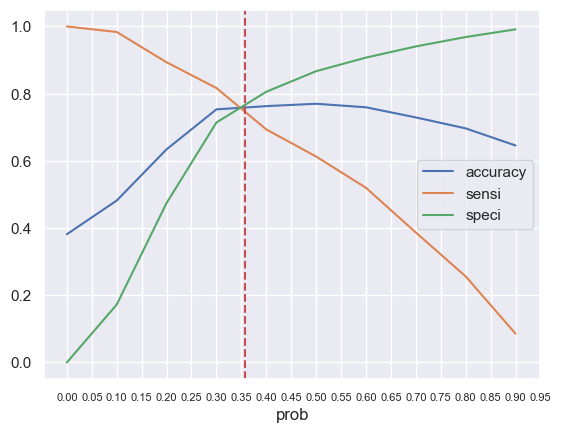

In [296]:
#Plotting accuracy, sensitivity and specificity for various probabilities
sns.set(style = 'darkgrid')

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') 

plt.show()

#### From the curve above, it seems that  0.35 is optimal cutoff point to take .

In [297]:
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.358 cutoff point

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [298]:
# Dropping the unnecessary columns

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 

In [299]:
#Displaying the head

y_train_pred_final.head() 

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.35,302,0
1,0,0.02,6087,0
2,0,0.10,1033,0
3,0,0.06,7656,0
4,1,0.73,3241,1


Assigning lead score to the leads based to prediction

In [300]:
# Assigning the 'Lead_Score' based on 'Converted_Prob'

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [301]:
# Selecting only important columns and displaying head of dataframe

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.35,302,0,35
1,0,0.02,6087,0,2
2,0,0.10,1033,0,10
3,0,0.06,7656,0,6
4,1,0.73,3241,1,73


### 9. Model Evaluation

#### Confusion Matrix

In [302]:
#Importing 'metrics' library

from sklearn import metrics

# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3006  929]
 [ 546 1882]]


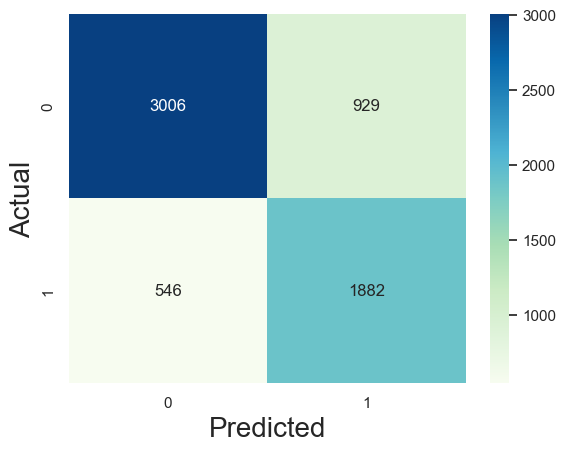

In [303]:
#Importing library to plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plotting confusion matrix
sns.heatmap(confusion, annot=True, fmt='g', cmap='GnBu')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.show()



In [304]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7681911048247682

In [305]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [306]:
# Checking the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7751235584843492

In [307]:
# Calculating specificity

TN / float(TN+FP)

0.7639135959339263

In [308]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.2360864040660737


In [309]:
# positive predictive value

print (TP / float(TP+FP))

0.6695126289576663


In [310]:
# Negative predictive value


print (TN / float(TN+ FN))

0.8462837837837838


### Precision and Recall

In [311]:
# Precision TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6695126289576663

In [312]:
# Recall  TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7751235584843492

In [313]:
#Importing 'precision_score' and 'recall_score'

from sklearn.metrics import precision_score, recall_score

# Calculating Precision value

precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.6695126289576663

In [314]:
#Calculating Recall value

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7751235584843492

Observations:
    

We have the following values for the Train Data:

Accuracy : 76%

Sensitivity :77%

Specificity : 76%

Precision: 66.9%

Recall: 77%


In [315]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [316]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

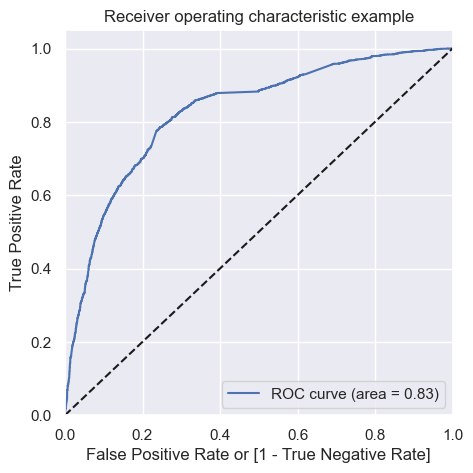

In [317]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Observation

We are getting a good value of 0.83 indicating a good predictive model.As ROC Curve should be a value close to 1.

#### Precision and recall tradeoff

In [318]:
# Importing required library for 'precision_recall_curve'

from sklearn.metrics import precision_recall_curve

In [319]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

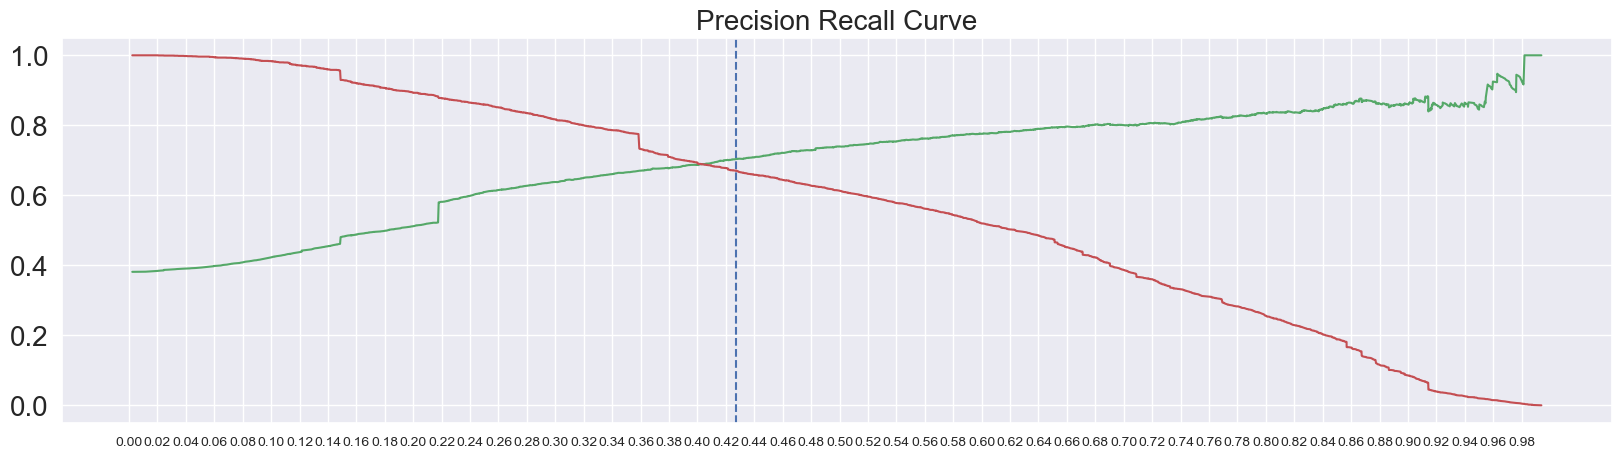

In [320]:
plt.figure(figsize=(20,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision Recall Curve',fontsize=20)
plt.axvline(x=0.427, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=10)
plt.yticks(size=20)

plt.show()

Now using this threshold value from 'Precision Recall Tradeoff Curve' for Data Evaluation

In [321]:
# plotting the Train dataset again with 0.427 as cutoff

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)
y_train_pred_final.head() # Displaying head 

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score,final_predicted_2
0,0,0.35,302,0,35,0
1,0,0.02,6087,0,2,0
2,0,0.10,1033,0,10,0
3,0,0.06,7656,0,6,0
4,1,0.73,3241,1,73,1


In [322]:
# Confusion matrix

confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_2)

[[3249  686]
 [ 799 1629]]


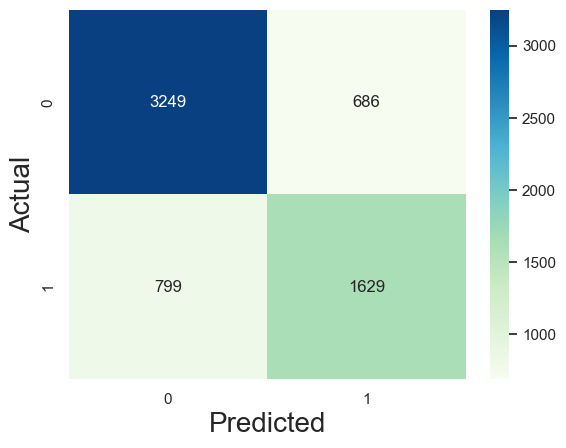

In [323]:
# Plotting confusion matrix
sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [324]:
# Check the overall accuracy:-

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.7666195190947667

In [325]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [326]:
# Checking the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6709225700164745

In [327]:
# Calculating specificity

TN / float(TN+FP)

0.8256670902160101

In [328]:
# positive predictive value

print (TP / float(TP+FP))

0.703671706263499


In [329]:
# Negative predictive value:-

print (TN / float(TN+ FN))

0.8026185770750988


In [330]:
# Precision

confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.703671706263499

In [331]:
# Calculating 'Recall'

confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.6709225700164745

Conclusion:
The current model's performance shows a trade-off between precision and recall, with a specific focus on achieving 
a higher recall. By adjusting the cutoff point to 0.358, the model aims to increase sensitivity, thereby capturing
more True Positives and improving its overall effectiveness in identifying positive cases. This approach ensures a 
better balance between identifying actual positive cases and maintaining an acceptable level of precision.








### 11: Making predictions on the test set

In [332]:
# Applying 'transform' to scale the 'test' data set

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [333]:
# Predicting using values used by the final model i.e. logm3:-

test_col = X_train_sm3.columns

X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe:-
X_test = sm.add_constant(X_test)

X_test.info() #Displaying info about columns

<class 'pandas.core.frame.DataFrame'>
Index: 2727 entries, 6906 to 6219
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   const                                   2727 non-null   float64
 1   Lead Origin                             2727 non-null   int32  
 2   Lead Source                             2727 non-null   int32  
 3   Do Not Email                            2727 non-null   int64  
 4   Total Time Spent on Website             2727 non-null   float64
 5   Page Views Per Visit                    2727 non-null   float64
 6   Last Activity                           2727 non-null   int32  
 7   Specialization                          2727 non-null   int32  
 8   A free copy of Mastering The Interview  2727 non-null   int64  
dtypes: float64(3), int32(4), int64(2)
memory usage: 170.4 KB


In [334]:
# Predicting on test data set using final model

y_test_pred = logm3.predict(X_test)

In [335]:
# Checking top 10 rows

y_test_pred[:10]

6906   0.88
1873   0.45
771    0.03
4495   0.14
9061   0.69
4929   0.72
2308   0.15
1034   0.18
9033   0.21
7008   0.86
dtype: float64

In [336]:
# Converting y_test_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [337]:
# Let's see the head
y_pred_1.head()

,0
6906,0.88
1873,0.45
771,0.03
4495,0.14
9061,0.69


In [338]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [339]:
# Putting 'Prospect ID' to index

y_test_df['Prospect ID'] = y_test_df.index

In [340]:
# Removing index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [341]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [342]:
# Displaying head of 'y_pred_final' 
y_pred_final.head()

,Converted,Prospect ID,0
0,1,6906,0.88
1,0,1873,0.45
2,0,771,0.03
3,0,4495,0.14
4,1,9061,0.69


In [343]:
# Renaming the column '0' as 'Converted_Prob'

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [344]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [345]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,6906,1,0.88
1,1873,0,0.45
2,771,0,0.03
3,4495,0,0.14
4,9061,1,0.69


In [346]:
#Assigning 'Lead Score' to dataframe 'y_pred_final'

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))


y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,6906,1,0.88,88
1,1873,0,0.45,45
2,771,0,0.03,3
3,4495,0,0.14,14
4,9061,1,0.69,69


In [347]:
# Calculating 'final_Predicted' based on 'Converted_Prob' for cutoff point 0.35

y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,final_Predicted
0,6906,1,0.88,88,1
1,1873,0,0.45,45,1
2,771,0,0.03,3,0
3,4495,0,0.14,14,0
4,9061,1,0.69,69,1


In [348]:
# Checking the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7667766776677668

#### Confusion matrix 

In [349]:
# Calculating confusion matrix for test data

confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1269,  391],
       [ 245,  822]], dtype=int64)

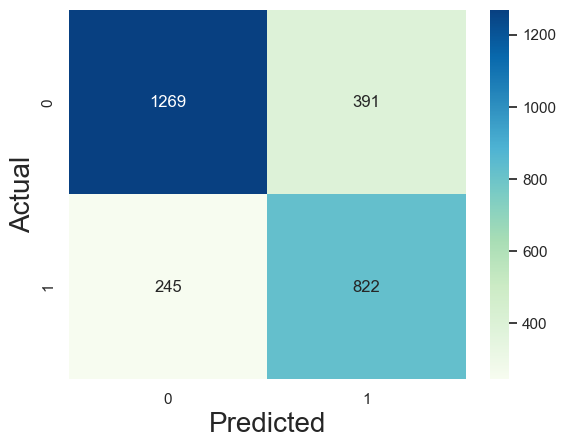

In [350]:
# Plotting confusion matrix
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [351]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [352]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7703842549203374

In [353]:
# Let us calculate specificity

TN / float(TN+FP)

0.7644578313253012

In [354]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.2355421686746988


In [355]:
# positive predictive value 

print (TP / float(TP+FP))

0.6776586974443528


In [356]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8381770145310435


### Precision and Recall

In [357]:
# Calculating 'precision_score'

precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.6776586974443528

In [358]:
#Calculating 'recall_score'


recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7703842549203374

### Determining top feature based on final model (logm5)

In [359]:
# Displaying parameters obtained by final model 'logm5'

pd.options.display.float_format = '{:.2f}'.format # Setting format option
logm3.params[1:]

Lead Origin                               0.75
Lead Source                               0.29
Do Not Email                             -1.48
Total Time Spent on Website               1.04
Page Views Per Visit                     -0.39
Last Activity                             0.23
Specialization                           -0.03
A free copy of Mastering The Interview   -0.22
dtype: float64

In [360]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_feature = logm3.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

Lead Origin                                72.49
Lead Source                                27.84
Do Not Email                             -142.41
Total Time Spent on Website               100.00
Page Views Per Visit                      -37.83
Last Activity                              22.44
Specialization                             -2.84
A free copy of Mastering The Interview    -21.25
dtype: float64

**High Impact Features:**

1. Total Time Spent on Website: Strongest positive predictor of conversion. Increasing the time leads spend on the website could improve conversion rates.
2. Do Not Email: Strongest negative predictor. Ensuring emails are sent and not marked as "Do Not Email" could significantly improve conversion rates.

**Moderate Impact Features:**

1. Lead Origin and Lead Source: Important features that significantly affect conversion. Efforts to optimize these sources can improve lead quality.

**Low Impact Features:**

Page Views Per Visit, Last Activity, A free copy of Mastering The Interview, Specialization: These have lower impacts. While they should not be ignored, their influence is relatively smaller compared to the top features.

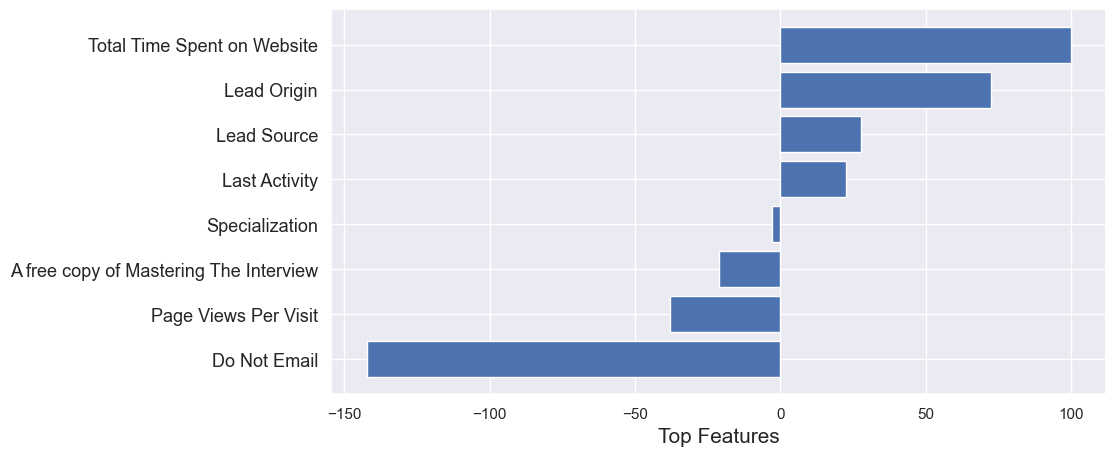

In [361]:
# Plotting the feature variables based on their relative importance

top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train_new.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

### Final Observation

**Recommendations Based on the Analysis**

**Maximize Website Engagement:**
Encourage leads to spend more time on the website through engaging content, interactive tools, and valuable resources.

**Optimize Lead Origin Channels:**
Focus marketing efforts on lead origin sources that have shown higher conversion rates.

**Improve Email Communication:**
Develop strategies to reduce the 'Do Not Email' rate by ensuring email content is relevant, personalized, and valuable to leads.

**Refine Lead Source Strategies:**
Concentrate efforts on lead sources that contribute positively to conversion rates.

**Monitor and Optimize Website Navigation:**
While 'Page Views Per Visit' has a negative impact, it could be due to a complex or confusing website layout. Simplify navigation to improve user experience.

**Analyze and Enhance Last Activity:**
Investigate what activities are beneficial and promote those to increase conversion rates.



The plot effectively highlights the features that are most influential in predicting lead conversion. By focusing on maximizing positive features and mitigating the impact of negative features, you can enhance overall conversion rates

### Conclusion:


The analysis of the logistic regression model and the provided data highlights the key variables and strategies to optimize lead conversion efforts based on different scenarios. By focusing on the top contributing factors and tailoring the approach based on the business cycle, X Education can effectively manage its lead conversion process.